In [126]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

Ex1

In [254]:
x, y = make_blobs(n_samples=500, centers=[(0, 0)], n_features=2, cluster_std=1)

In [256]:
vectors = np.random.multivariate_normal(np.zeros(2), np.eye(2), size=5)
proj = x@vectors.T

In [343]:
def probabilities_and_bins(n_bins=10):
    probabilities_list = []
    bins_list = []
    
    for p in proj.T:
        p_range = (p.min() - 50, p.max() + 50)
        histogram, b = np.histogram(p, bins=n_bins, range=p_range)
        prob = histogram / np.sum(histogram)
    
        probabilities_list += [prob]
        bins_list += [b]

    return probabilities_list, bins_list

In [345]:
def anomaly_score(point):
    proj = point@vectors.T
    probability = 0

    for i in range(5):
        index = np.digitize(proj[i], bins_list[i]) - 1
        index = np.clip(index, 0, len(bins_list[i]) - 1)
        prob = probabilities_list[i][index]
        probability += prob

    return 1 - probability/5

In [347]:
test_data = np.random.uniform(-3, 3, size=(500, 2))

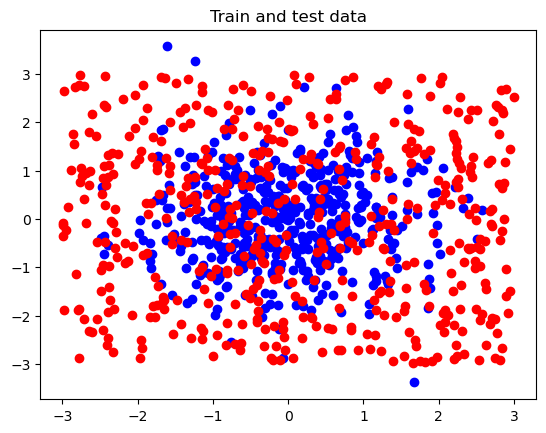

In [349]:
scatter_train = plt.scatter(x[:, 0], x[:, 1], color="blue")
scatter_test = plt.scatter(test_data[:, 0], test_data[:, 1], color="red")
plt.title("Train and test data")
plt.show()

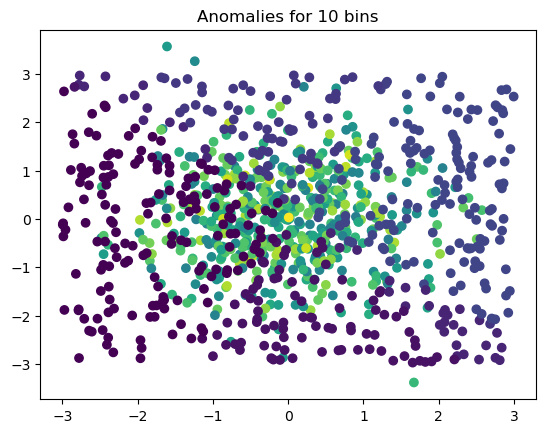

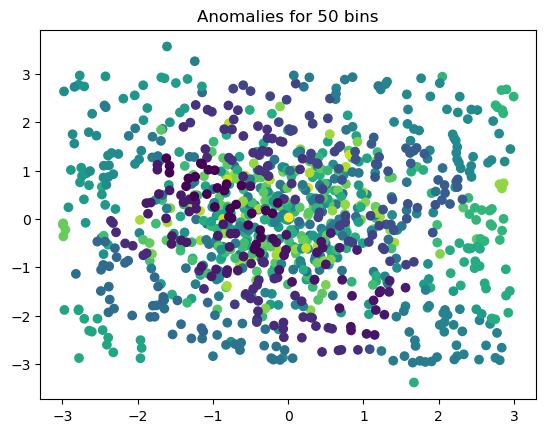

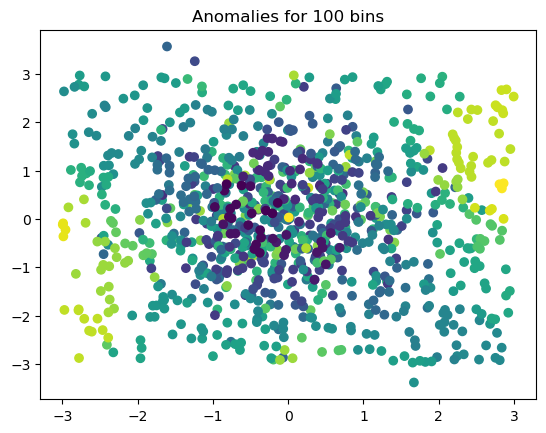

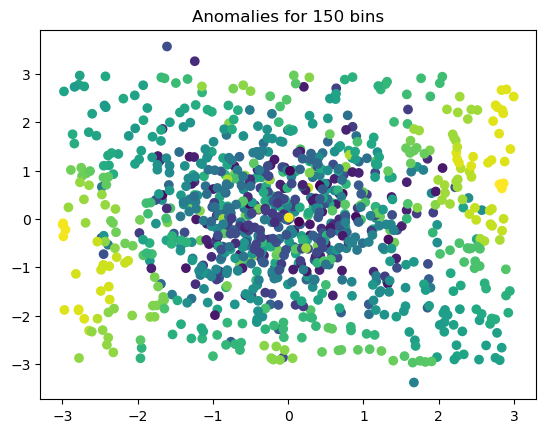

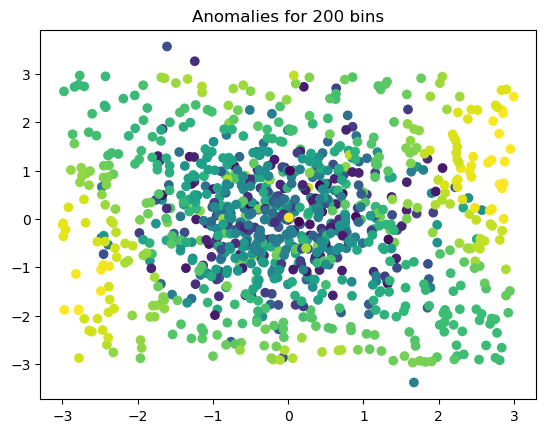

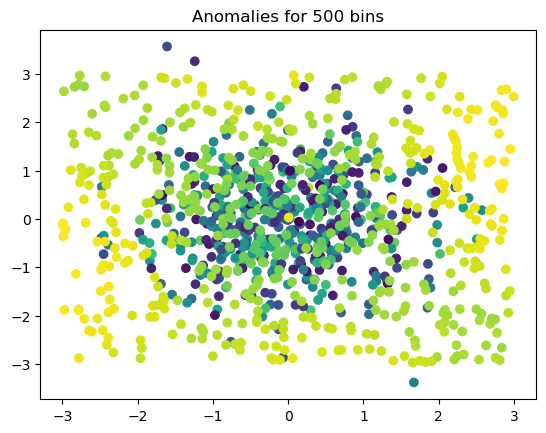

In [353]:
data = np.vstack((x, test_data))

for n_bins in [10,50,100,150,200,500]:
    probabilities_list, bins_list = probabilities_and_bins(n_bins)
    test_scores = np.array([anomaly_score(point) for point in test_data])
    scores = np.concatenate((anomaly_scores, test_scores))
    
    scatter = plt.scatter(data[:, 0], data[:, 1], c=scores)
    plt.title(f'Anomalies for {n_bins} bins')
    plt.show()

Ex2

In [6]:
x, y = make_blobs(n_samples=1000, centers=[(10, 0), (0, 10)], cluster_std=1)

In [8]:
iforest = IForest(contamination=0.02)
iforest.fit(x)

IForest(behaviour='old', bootstrap=False, contamination=0.02,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

In [10]:
test_data = np.random.uniform(-10, 20, (1000, 2))

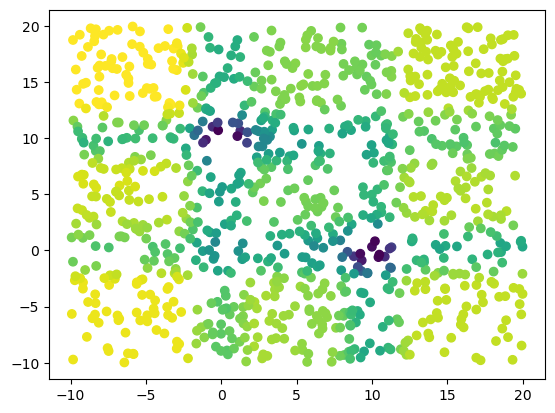

In [14]:
iforest_scores = iforest.decision_function(test_data)

sc = plt.scatter(test_data[:, 0], test_data[:, 1], c=iforest_scores)
plt.show()

In [16]:
dif = DIF(contamination=0.02)
loda = LODA(contamination=0.02)

dif.fit(x)
loda.fit(x)

dif_scores = dif.decision_function(test_data)
loda_scores = loda.decision_function(test_data)

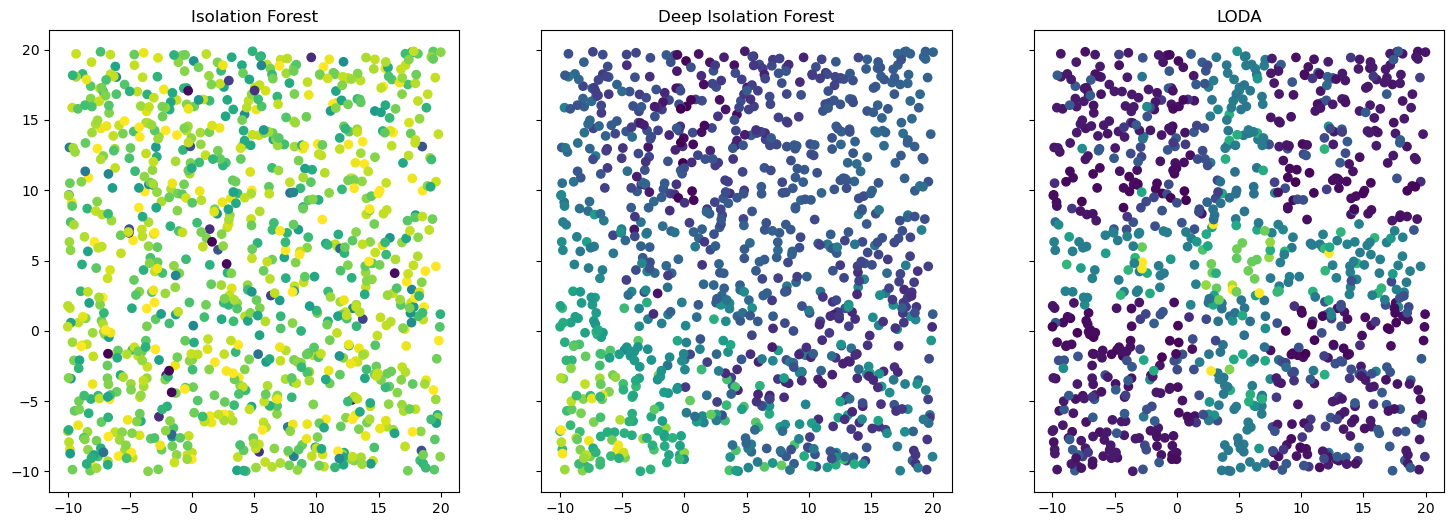

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

sc1 = axs[0].scatter(test_data[:, 0], test_data[:, 1], c=iforest_scores)
axs[0].set_title("Isolation Forest")

sc2 = axs[1].scatter(test_data[:, 0], test_data[:, 1], c=dif_scores)
axs[1].set_title("Deep Isolation Forest")

sc3 = axs[2].scatter(test_data[:, 0], test_data[:, 1], c=loda_scores)
axs[2].set_title("LODA")

plt.show()

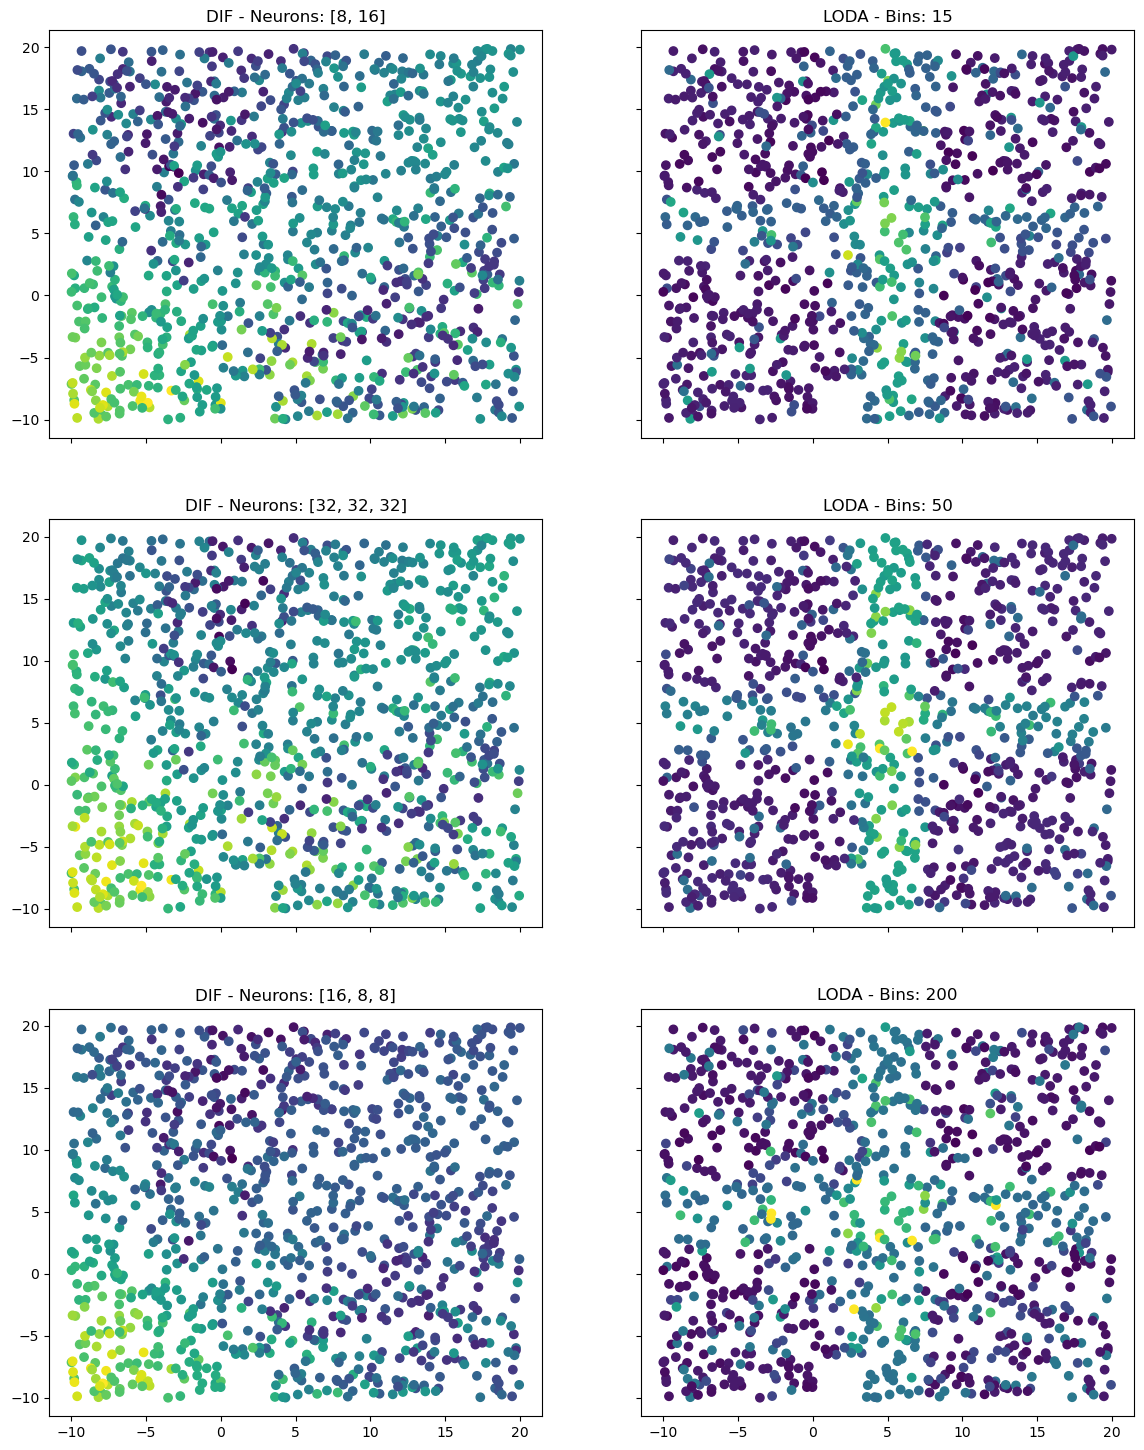

In [51]:
dif_neurons = [[8,16],[32,32,32],[16,8,8]]
loda_bins = [15,50,200]

fig, axs = plt.subplots(3, 2, figsize=(14, 18), sharex=True, sharey=True)

for i, neurons in enumerate(dif_neurons):
        dif = DIF(hidden_neurons=neurons, contamination=0.02)
        dif.fit(x)
        dif_scores = dif.decision_function(test_data)

        bins = loda_bins[i]
        loda = LODA(n_bins=bins, contamination=0.02)
        loda.fit(x)
        loda_scores = loda.decision_function(test_data)

        sc1 = axs[i, 0].scatter(test_data[:, 0], test_data[:, 1], c=dif_scores)
        axs[i, 0].set_title(f"DIF - Neurons: {neurons}")

        sc2 = axs[i, 1].scatter(test_data[:, 0], test_data[:, 1], c=loda_scores)
        axs[i, 1].set_title(f"LODA - Bins: {bins}")

plt.show()

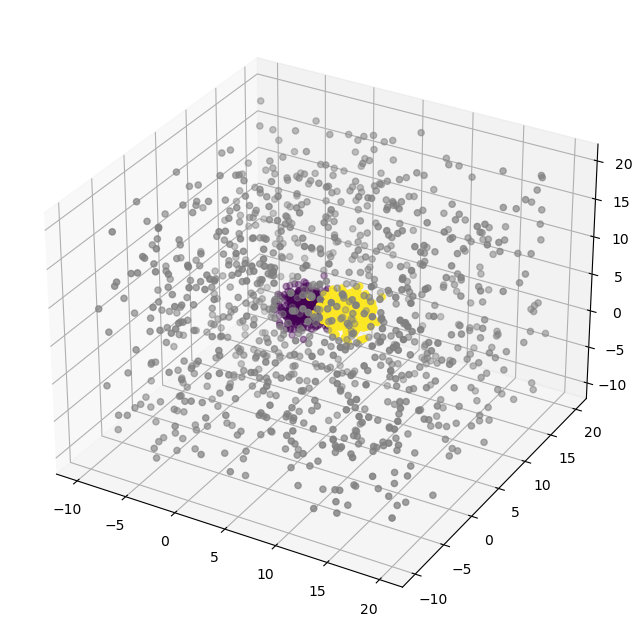

In [97]:
x, y = make_blobs(n_samples=1000, centers=[(0, 10, 0), (10, 0, 10)], cluster_std=1, n_features=3)

test_data = np.random.uniform(-10, 20, (1000, 3))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c='gray')
plt.show()

C:\Users\Maria\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


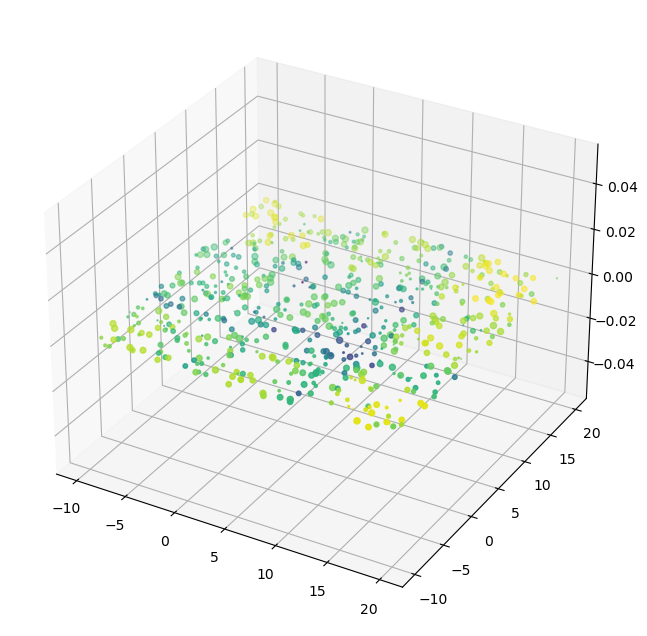

In [81]:
iforest = IForest(contamination=0.02)
iforest.fit(x)

iforest_scores = iforest.decision_function(test_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=iforest_scores)
plt.show()

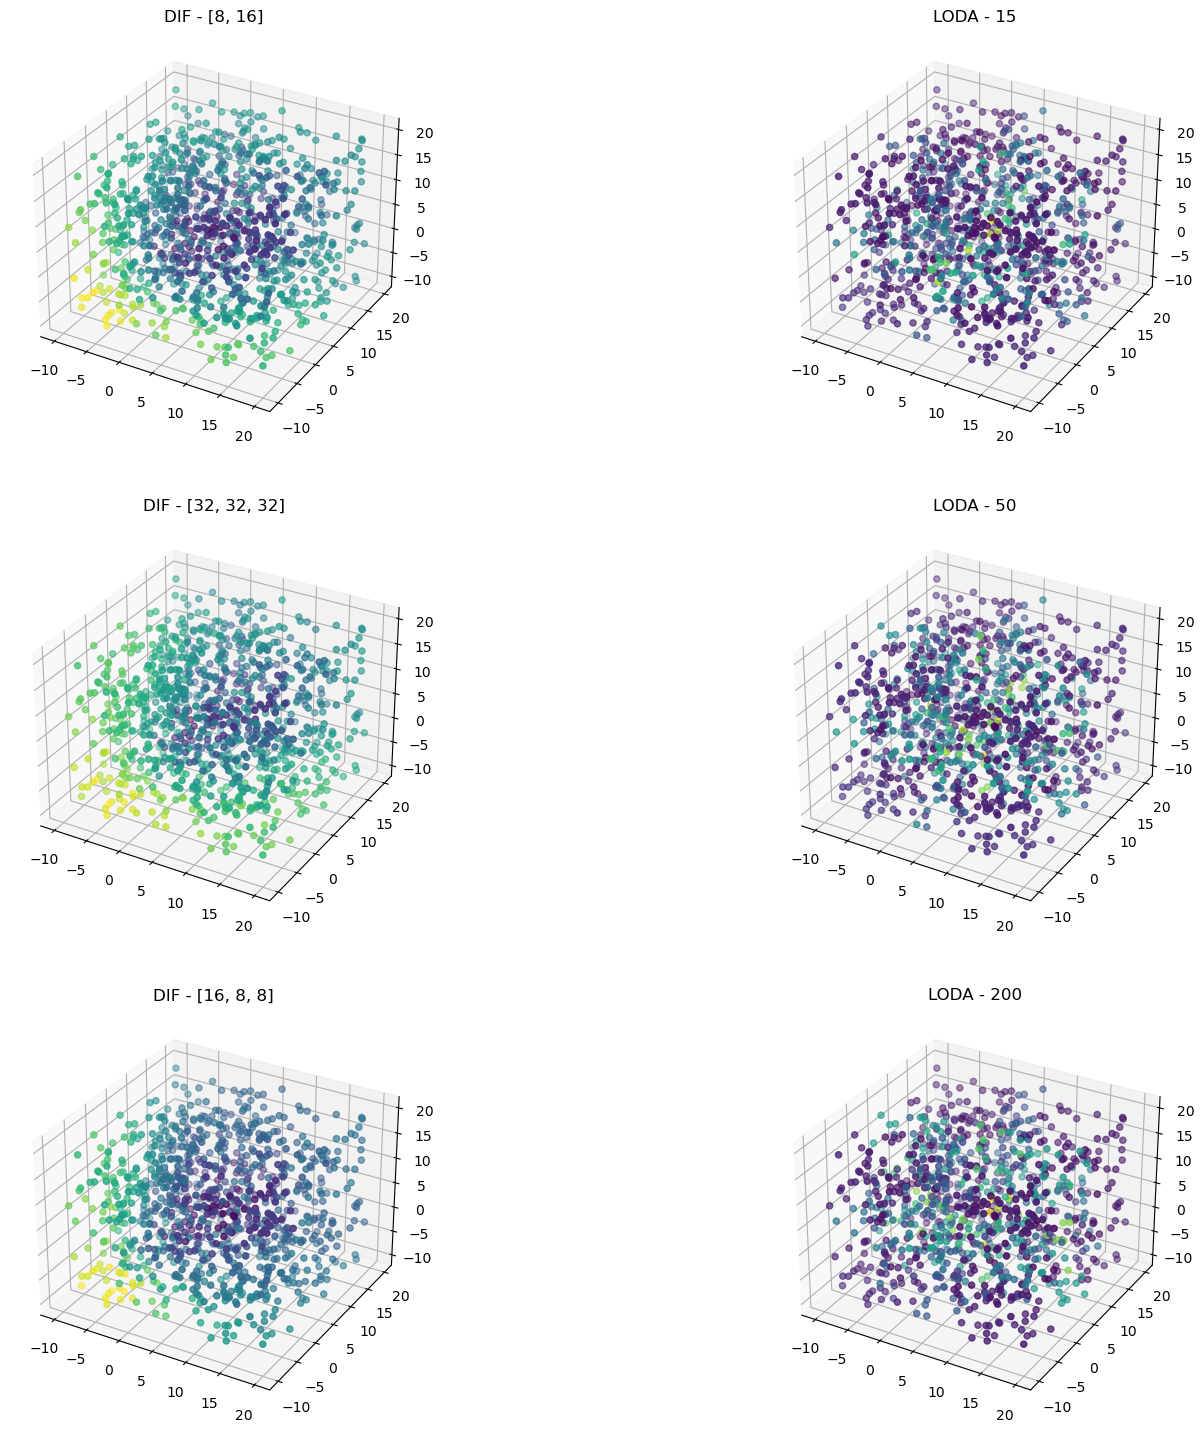

In [100]:
dif_neurons = [[8,16],[32,32,32],[16,8,8]]
loda_bins = [15,50,200]

fig, axs = plt.subplots(3, 2, figsize=(18, 18), subplot_kw={'projection': '3d'})

for i, neurons in enumerate(dif_neurons):
        dif = DIF(hidden_neurons=neurons, contamination=0.02)
        dif.fit(x)
        dif_scores = dif.decision_function(test_data)

        bins = loda_bins[i]
        loda = LODA(n_bins=bins, contamination=0.02)
        loda.fit(x)
        loda_scores = loda.decision_function(test_data)

        axs[i, 0].scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=dif_scores)
        axs[i, 0].set_title(f"DIF - {dif_neurons[i]}")

        axs[i, 1].scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=loda_scores)
        axs[i, 1].set_title(f"LODA - {loda_bins[i]}")

plt.show()

Ex3

In [141]:
data = loadmat("shuttle.mat")
x = data['X'] 
y = data['y'].ravel()

In [145]:
ba_scores = {'IForest': [], 'LODA': [], 'DIF': []}
roc_scores = {'IForest': [], 'LODA': [], 'DIF': []}

for i in range(3):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std 

    iforest = IForest()
    loda = LODA()
    dif = DIF() 
    
    iforest.fit(x_train)
    loda.fit(x_train)
    dif.fit(x_train)

    iforest_scores = iforest.decision_function(x_test)
    loda_scores = loda.decision_function(x_test)
    dif_scores = dif.decision_function(x_test)
    
    iforest_labels = iforest.predict(x_test)
    loda_labels = loda.predict(x_test)
    dif_labels = dif.predict(x_test)

    ba_scores['IForest'] += [balanced_accuracy_score(y_test, iforest_labels)]
    ba_scores['LODA'] += [balanced_accuracy_score(y_test, loda_labels)]
    ba_scores['DIF'] += [balanced_accuracy_score(y_test, dif_labels)]

    roc_scores['IForest'] += [roc_auc_score(y_test, iforest_scores)]
    roc_scores['LODA'] += [roc_auc_score(y_test, loda_scores)]
    roc_scores['DIF'] += [roc_auc_score(y_test, dif_scores)]

mean_ba = {model: np.mean(scores) for model, scores in ba_scores.items()}
mean_roc = {model: np.mean(scores) for model, scores in roc_scores.items()}

print("Mean BA:", mean_ba)
print("Mean ROC:", mean_roc)

Mean BA: {'IForest': 0.9759694673030664, 'LODA': 0.5306686441748182, 'DIF': 0.5246371829008306}
Mean ROC: {'IForest': 0.9971632526163914, 'LODA': 0.48440325726238903, 'DIF': 0.9645941988698669}
